In [1]:
# imdb(internet movie database) => 긍정, 부정 리뷰 5만개로 이루어진 데이터셋
# 훈련 데이터 25000개, 테스트 데이터 25000개

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [24]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) 
#가장 자주 등장하는 단어 1만개로 제한

train_labels[0] #긍정의 경우 1, 부정의 경우 0을 나타내는 리스트

1

In [13]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#데이터 전처리 과정

In [18]:
#신경망 모델 생성

model = models.Sequential([
    layers.Dense(16, activation = 'relu', input_shape = (10000,)),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid') #시그모이드는 임의의 값을 0~1로 압축하므로, 출력 값을 확률처럼 해석 가능
])

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [19]:
#Validation data 추출

x_val = x_train[:1000]
x_train = x_train[1000:]
y_val = y_train[:1000]
y_train = y_train[1000:]

In [20]:
history = model.fit(x_train, y_train, epochs=20, batch_size =512, validation_data = (x_val, y_val))

Train on 24000 samples, validate on 1000 samples
Epoch 1/20
24000/24000 [==============================] - 2s 87us/sample - loss: 0.5600 - accuracy: 0.7788 - val_loss: 0.4021 - val_accuracy: 0.8600
Epoch 2/20
24000/24000 [==============================] - 1s 34us/sample - loss: 0.3077 - accuracy: 0.8979 - val_loss: 0.2714 - val_accuracy: 0.8810
Epoch 3/20
24000/24000 [==============================] - 1s 35us/sample - loss: 0.2103 - accuracy: 0.9258 - val_loss: 0.2528 - val_accuracy: 0.8860
Epoch 4/20
24000/24000 [==============================] - 1s 35us/sample - loss: 0.1640 - accuracy: 0.9429 - val_loss: 0.2594 - val_accuracy: 0.8870
Epoch 5/20
24000/24000 [==============================] - 1s 35us/sample - loss: 0.1365 - accuracy: 0.9550 - val_loss: 0.2721 - val_accuracy: 0.8880
Epoch 6/20
24000/24000 [==============================] - 1s 33us/sample - loss: 0.1133 - accuracy: 0.9641 - val_loss: 0.2939 - val_accuracy: 0.8850
Epoch 7/20
24000/24000 [==============================] -

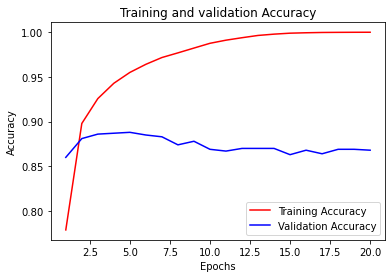

In [22]:
# Accuracy 그래프 그리기

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("Training and validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()